Итоговая работа
=====================

Поздравляю вас, теперь вы вооружены знаниями по предобработке данных, и пора применить их на интересном кейсе.

Представлены данные такси, по которым мы должны предсказать возьмёт ли таксист заказ или нет(driver_response).

Принципы вы знаете, чек-лист аналогичен лабораторной работе.

Чек-лист:
1. Загрузите датасет taxi.csv.
2. Посмотрите на данные. Отобразите общую информацию по признакам (вспомните о describe и info). Напишите в markdown свои наблюдения.
3. Выявите пропуски, а также возможные причины их возникновения. Решите, что следует сделать с ними. Напишите в markdown свои наблюдения.
4. Оцените зависимости переменных между собой. Используйте корреляции. Будет хорошо, если воспользуетесь profile_report. Напишите в markdown свои наблюдения.
5. Определите стратегию преобразования категориальных признаков (т.е. как их сделать адекватными для моделей).
6. Найдите признаки, которые можно разделить на другие, или преобразовать в другой тип данных. Удалите лишние, при необходимости.
7. Разделите выборку на обучаемую и тестовую.
8. Обучите модель. Напишите в markdown свои наблюдения по полученным результатам. Хорошие результаты дают классификаторы RandomForest и XGBoost

Если возникнут затруднения, то смотрите на материал практических занятий. Данного там должно хватить для выполнения всех пунктов. Желаю успеха!

#приступим
1. Загрузите датасет taxi.csv.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('taxi.csv')
data.head()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
0,1105373,5,20,6080,174182,55.818842,37.334562,55.814567,37.355010,-1.000,-1.000,Economy,private,0
1,759733,5,14,6080,358774,55.805342,37.515023,55.819329,37.466398,18.802,25.217,Standard,private,1
2,416977,6,14,6080,866260,55.813978,37.347688,55.814827,37.354074,6.747,9.800,Economy,private,0
3,889660,2,6,6080,163522,55.745922,37.421748,55.743469,37.431130,-1.000,-1.000,Economy,private,1
4,1120055,4,16,6080,506710,55.803578,37.521602,55.812559,37.527407,12.383,19.250,Economy,private,1


 2. Посмотрите на данные. Отобразите общую информацию по признакам (вспомните о describe и info). Напишите в markdown свои наблюдения.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
offer_gk                  100000 non-null int64
weekday_key               100000 non-null int64
hour_key                  100000 non-null int64
driver_gk                 100000 non-null int64
order_gk                  100000 non-null int64
driver_latitude           100000 non-null float64
driver_longitude          100000 non-null float64
origin_order_latitude     100000 non-null float64
origin_order_longitude    100000 non-null float64
distance_km               100000 non-null float64
duration_min              100000 non-null float64
offer_class_group         100000 non-null object
ride_type_desc            100000 non-null object
driver_response           100000 non-null int64
dtypes: float64(6), int64(6), object(2)
memory usage: 10.7+ MB


Хорошо что нет нулов
выборка достаточно большая
основной объем данных уже числовой

In [5]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
offer_gk,100000.0,566218.928650,325935.980081,4.0,285555.250000,565671.500000,848719.750000,1.130355e+06
weekday_key,100000.0,3.159860,2.054222,0.0,1.000000,3.000000,5.000000,6.000000e+00
hour_key,100000.0,13.827790,7.306496,0.0,8.000000,16.000000,20.000000,2.300000e+01
driver_gk,100000.0,3446.376360,2038.738677,14.0,1421.000000,3506.500000,5242.000000,6.806000e+03
order_gk,100000.0,460867.012910,266064.989530,18.0,229178.500000,462420.000000,690894.000000,9.203440e+05
driver_latitude,100000.0,55.700824,2.135903,-1.0,55.708651,55.772904,55.960667,5.617410e+01
driver_longitude,100000.0,37.492292,1.454640,-1.0,37.413497,37.533664,37.624113,3.828055e+01
origin_order_latitude,100000.0,55.772440,0.665985,-1.0,55.708032,55.772561,55.962000,5.631112e+01
origin_order_longitude,100000.0,37.541637,0.467758,-1.0,37.407117,37.532537,37.624358,3.824361e+01
distance_km,100000.0,18.393518,41.129296,-1.0,-1.000000,10.411500,30.665250,5.234283e+03


offer_gk - это id предложения водителю. разброс огромный. не нужно
weekday_key - день недели. 0 - вск, 6 суб. Оставляем. Выбрасов за пределы нет
hour_key - час дня заказа. 0-23. Оставляем. выбрасов за пределы нет
driver_gk - id водителя. Ну не уверен что поле это нужно. огромные разбросы, так как это id
order_gk - id заказа. в рамках заказа несколько предложений. не нужно
driver_latitude - широта водителя на момент получения заказа. имеет значения -1 - те часть данных нет
driver_longitude - долгота водителя на момент получения заказа. имеет значения -1 - те часть данных нет
origin_order_latitude	- широта начала маршрута заказа.  имеет значения -1 - те часть данных нет
origin_order_longitude - долгота начала маршрута заказа. имеет значения -1 - те часть данных нет
distance_km - дистанция в км от места заказа до места назначения. -1 те в части данных нет растояния.
duration_min - время в пути от места заказа до места назначения.  -1 те в части данных нет времени.
offer_class_group - классификационный признак. Класс заказа.
ride_type_desc - классификационный признак. Тип заказа - бизнес\не бизнес
driver_response - целевая функция. Принятие или отказ водителя в предложении.


  #3. Выявите пропуски, а также возможные причины их возникновения. Решите, что следует сделать с ними. Напишите в markdown свои наблюдения.

In [6]:
data[data['driver_latitude']==-1].count()
#140 значений не материально для объема выборки. удалить

offer_gk                  140
weekday_key               140
hour_key                  140
driver_gk                 140
order_gk                  140
driver_latitude           140
driver_longitude          140
origin_order_latitude     140
origin_order_longitude    140
distance_km               140
duration_min              140
offer_class_group         140
ride_type_desc            140
driver_response           140
dtype: int64

In [30]:
data[data['driver_longitude']==-1].count()
#так же не материально.

offer_gk                  140
weekday_key               140
hour_key                  140
driver_gk                 140
order_gk                  140
driver_latitude           140
driver_longitude          140
origin_order_latitude     140
origin_order_longitude    140
distance_km               140
duration_min              140
offer_class_group         140
ride_type_desc            140
driver_response           140
dtype: int64

In [10]:
data[data['driver_longitude']==-1].head(20)
#пересечение выборки ширина и долгота

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
565,638186,5,14,6272,817074,-1.0,-1.0,55.908664,37.597781,-1.000,-1.00,Standard,business,1
2111,567790,1,12,6792,820788,-1.0,-1.0,55.415361,37.898917,-1.000,-1.00,Standard,business,1
2129,302376,1,1,6792,548327,-1.0,-1.0,55.415361,37.898917,83.923,81.35,Standard,business,1
2137,427612,6,21,6792,32158,-1.0,-1.0,55.415361,37.898917,-1.000,-1.00,Standard,business,1
2142,202875,6,3,6792,346671,-1.0,-1.0,55.415361,37.898917,70.529,65.00,Standard,business,1
2145,845726,6,0,6792,552732,-1.0,-1.0,55.415361,37.898917,-1.000,-1.00,Standard,business,1
2183,177029,0,17,6792,658177,-1.0,-1.0,55.415361,37.898917,-1.000,-1.00,Standard,business,1
2191,10275,3,11,6792,92302,-1.0,-1.0,55.415361,37.898917,-1.000,-1.00,Standard,business,1
2221,1039638,5,22,6792,378336,-1.0,-1.0,55.415361,37.898917,-1.000,-1.00,Standard,business,1
2268,378336,1,11,6792,354709,-1.0,-1.0,55.415361,37.898917,-1.000,-1.00,Standard,business,1


In [11]:
data[data['origin_order_latitude']==-1].count()

offer_gk                  13
weekday_key               13
hour_key                  13
driver_gk                 13
order_gk                  13
driver_latitude           13
driver_longitude          13
origin_order_latitude     13
origin_order_longitude    13
distance_km               13
duration_min              13
offer_class_group         13
ride_type_desc            13
driver_response           13
dtype: int64

In [12]:
data[data['origin_order_longitude']==-1].count()

offer_gk                  13
weekday_key               13
hour_key                  13
driver_gk                 13
order_gk                  13
driver_latitude           13
driver_longitude          13
origin_order_latitude     13
origin_order_longitude    13
distance_km               13
duration_min              13
offer_class_group         13
ride_type_desc            13
driver_response           13
dtype: int64

In [13]:
data[data['distance_km']==-1].count()

offer_gk                  26207
weekday_key               26207
hour_key                  26207
driver_gk                 26207
order_gk                  26207
driver_latitude           26207
driver_longitude          26207
origin_order_latitude     26207
origin_order_longitude    26207
distance_km               26207
duration_min              26207
offer_class_group         26207
ride_type_desc            26207
driver_response           26207
dtype: int64

In [34]:
data[data['distance_km']==0].count()

offer_gk                  152
weekday_key               152
hour_key                  152
driver_gk                 152
order_gk                  152
driver_latitude           152
driver_longitude          152
origin_order_latitude     152
origin_order_longitude    152
distance_km               152
duration_min              152
offer_class_group         152
ride_type_desc            152
driver_response           152
dtype: int64

In [14]:
data[data['duration_min']==-1].count()

offer_gk                  26207
weekday_key               26207
hour_key                  26207
driver_gk                 26207
order_gk                  26207
driver_latitude           26207
driver_longitude          26207
origin_order_latitude     26207
origin_order_longitude    26207
distance_km               26207
duration_min              26207
offer_class_group         26207
ride_type_desc            26207
driver_response           26207
dtype: int64

In [35]:
data[data['duration_min']==0].count()

offer_gk                  152
weekday_key               152
hour_key                  152
driver_gk                 152
order_gk                  152
driver_latitude           152
driver_longitude          152
origin_order_latitude     152
origin_order_longitude    152
distance_km               152
duration_min              152
offer_class_group         152
ride_type_desc            152
driver_response           152
dtype: int64

In [29]:
data.groupby('driver_response').driver_response.count()

driver_response
0    50752
1    49248
Name: driver_response, dtype: int64

driver_latitude - всего 140 пропусков можно удалить
driver_longitude - всего 140 пропусков можно удалить + пересекаются по широте
origin_order_latitude	- всего 13 пропусков можно удалить
origin_order_longitude - всего 13 пропусков можно удалить + пересекаются по широте
distance_km - 26207 пропусков (-1). Очень много. потеря 26% дата сета при удалении. Пункт назначения не установлен (данные дата сета). Те условно свободная поезда по городу и платишь за время. Оставляем как есть. условно это классификационный признак. Можно подумать как с этим жить. Но я бы оставил как есть.
distance_km - 152 значения где растояние (и длительность) равна 0. Уберем. Это не материально для выборки
duration_min - пересекается с Км, см выше
offer_class_group - 'Test' - вообще удалить. Оставить Economy и Standard. Остальные свернуть в группу OTHER. Иначе группы не сопоставимые
ride_type_desc - оставляем private и business. Остальные схлопываем в OTHER

#4. Оцените зависимости переменных между собой. Используйте корреляции. Будет хорошо, если воспользуетесь profile_report. Напишите в markdown свои наблюдения.

In [31]:
import pandas_profiling as pp

In [32]:
report = pp.ProfileReport(data)
report.to_file('profile_report.html')

#см файл profile_report.html у меня что то не хочет показывать в ноутбуке данные профалера

#Предупреждения вполне логичные. Но являются нормальными для этого дата сета.
#распределение driver_gk дает задуматься - может вообще оставить в модели? всего 439 уникаьных значений (те 439 водителей, по идеи они имеют уникальную )
#distance_km - нужно проанализировать выбросы. те посмотреть диаграмму >0. Какие там распределение. Это так же закроект по идеи вопрос по длительности поездки. Покзатели сильную корреляцию имеют. Кореляция длительности поездки и растояния сильно зависимые. уберем понятие длительности, оно избыточное. Это как бы вообще одно и тоже просто в разных единицах
#hour_key - интересное распределение - заказывают в основном ближе к ночи. Но логично =)
#weekday_key - тоже логичное распределение =)
#кореляция между растоянием и продолжительностью, что писал выше
#интересная кореляция между продолжительность\растоянием и решением (целевой функции)
#интересная связи типов и классов. Хотя новерное логично. переведем классификаторы в инты и потом посмотрим еще раз

689

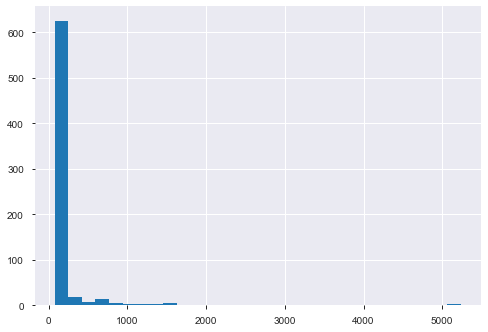

In [70]:
data[data['distance_km']>80].distance_km.hist(bins = 30)
data[data['distance_km']>80].distance_km.count()

In [54]:
data.groupby('distance_km').distance_km.count()

distance_km
-1.000       26207
 0.000         152
 0.005           1
 0.010           1
 0.020           5
             ...  
 2120.626        1
 3563.968        1
 4177.900        1
 5215.793        1
 5234.283        1
Name: distance_km, Length: 31297, dtype: int64

In [ ]:
#дистанцию больше 80 км тоже убираем. большие выбросы

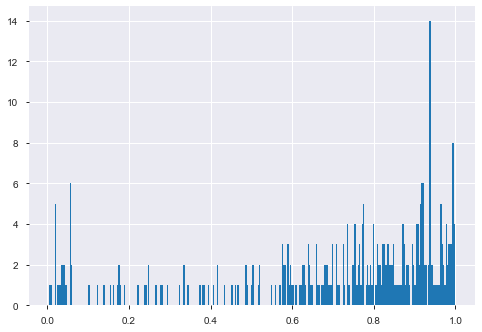

In [75]:

data[(data['distance_km']>0) & (data['distance_km']<1)].distance_km.hist(bins = 300)

In [83]:
data[(data['distance_km']>=0) & (data['distance_km']<=1)].distance_km.count()

477

In [80]:
#вообще убераем пробег менее или равно 1 км но больше или равно 0 и больше 80 км. это выбросы

#5. Определите стратегию преобразования категориальных признаков (т.е. как их сделать адекватными для моделей).

offer_class_group - 'Test' - вообще удалить. Оставить Economy и Standard. Остальные свернуть в группу OTHER. Иначе группы не сопоставимые
ride_type_desc - оставляем private и business. Остальные схлопываем в OTHER - а может вообще удалим, посмотрим когда обрежим выбросы и то что выше

In [27]:
data.groupby('offer_class_group').offer_class_group.count()

offer_class_group
Delivery     1290
Economy     48335
Kids          588
Premium      1773
Standard    47288
Test            8
VIP           225
VIP+           29
XL            464
Name: offer_class_group, dtype: int64

In [28]:
data.groupby('ride_type_desc').ride_type_desc.count()

ride_type_desc
SMB             36
affiliate      224
business      8533
private      91207
Name: ride_type_desc, dtype: int64

#6. Найдите признаки, которые можно разделить на другие, или преобразовать в другой тип данных. Удалите лишние, при необходимости.

1. категорийные переводим в инты.
2. Прогоним дополнительно на 2 версии преобразования в ван хот ин кодинг - но сначла глянем как отработает модель без этого
3. Попробуе получить растояние от места нахождения водителя до места заказа - тут должна быть большая связь. После этогого координаты удалим


In [85]:
#начнем подготовку данных для модели

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
offer_gk                  100000 non-null int64
weekday_key               100000 non-null int64
hour_key                  100000 non-null int64
driver_gk                 100000 non-null int64
order_gk                  100000 non-null int64
driver_latitude           100000 non-null float64
driver_longitude          100000 non-null float64
origin_order_latitude     100000 non-null float64
origin_order_longitude    100000 non-null float64
distance_km               100000 non-null float64
duration_min              100000 non-null float64
offer_class_group         100000 non-null object
ride_type_desc            100000 non-null object
driver_response           100000 non-null int64
dtypes: float64(6), int64(6), object(2)
memory usage: 10.7+ MB


In [193]:
data_to_model = data.copy()

In [194]:
data_to_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
offer_gk                  100000 non-null int64
weekday_key               100000 non-null int64
hour_key                  100000 non-null int64
driver_gk                 100000 non-null int64
order_gk                  100000 non-null int64
driver_latitude           100000 non-null float64
driver_longitude          100000 non-null float64
origin_order_latitude     100000 non-null float64
origin_order_longitude    100000 non-null float64
distance_km               100000 non-null float64
duration_min              100000 non-null float64
offer_class_group         100000 non-null object
ride_type_desc            100000 non-null object
driver_response           100000 non-null int64
dtypes: float64(6), int64(6), object(2)
memory usage: 10.7+ MB


In [195]:
#оставляю только то что считаю нужным
data_to_model = data_to_model[['weekday_key', 'hour_key', 'driver_latitude','driver_longitude','origin_order_latitude','origin_order_longitude','distance_km','offer_class_group','ride_type_desc','driver_response']]

In [196]:
data_to_model.head()

,weekday_key,hour_key,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,offer_class_group,ride_type_desc,driver_response
0,5,20,55.818842,37.334562,55.814567,37.355010,-1.000,Economy,private,0
1,5,14,55.805342,37.515023,55.819329,37.466398,18.802,Standard,private,1
2,6,14,55.813978,37.347688,55.814827,37.354074,6.747,Economy,private,0
3,2,6,55.745922,37.421748,55.743469,37.431130,-1.000,Economy,private,1
4,4,16,55.803578,37.521602,55.812559,37.527407,12.383,Economy,private,1


In [197]:
data_to_model.weekday_key.count()

100000

In [198]:
#сносим данные где нет координат водителя
data_to_model = data_to_model[data_to_model['driver_latitude']!=-1]

In [199]:
data_to_model.head()

,weekday_key,hour_key,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,offer_class_group,ride_type_desc,driver_response
0,5,20,55.818842,37.334562,55.814567,37.355010,-1.000,Economy,private,0
1,5,14,55.805342,37.515023,55.819329,37.466398,18.802,Standard,private,1
2,6,14,55.813978,37.347688,55.814827,37.354074,6.747,Economy,private,0
3,2,6,55.745922,37.421748,55.743469,37.431130,-1.000,Economy,private,1
4,4,16,55.803578,37.521602,55.812559,37.527407,12.383,Economy,private,1


In [200]:
data_to_model.weekday_key.count()

99860

In [201]:
#сносим где нет данных по месту нахождения заказчика
data_to_model = data_to_model[data_to_model['origin_order_longitude']!=-1]

In [202]:
data_to_model.weekday_key.count()

99847

In [203]:
#Убираем выбросы растояний
#большое растояние
data_to_model = data_to_model[data_to_model['distance_km']<80]
data_to_model.weekday_key.count()

99163

In [204]:
#убираем где дистанция от 0 до 1 км. это выброс
data_to_model = data_to_model.loc[(data_to_model['distance_km']<0) | (data_to_model['distance_km']>1)]

In [205]:
data_to_model.weekday_key.count()

98686

In [206]:
#убираем тестовый класс
data_to_model = data_to_model[data_to_model['offer_class_group']!='Test']


In [207]:
data_to_model.weekday_key.count()

98678

In [208]:
#перегруппировываем признаки offer_class_group и переводим их в инт

In [209]:
data.groupby('offer_class_group').offer_class_group.count()

offer_class_group
Delivery     1290
Economy     48335
Kids          588
Premium      1773
Standard    47288
Test            8
VIP           225
VIP+           29
XL            464
Name: offer_class_group, dtype: int64

In [210]:
dict_class = {'Economy':1,
       'Standard': 2,
       'Delivery':3,
       'Kids':3,
       'Premium':3,
        'VIP':3,
        'VIP+':3,
        'XL':3
      }

In [211]:
data_to_model['class'] = data_to_model.offer_class_group.replace(dict_class)
data_to_model = data_to_model[['weekday_key', 'hour_key', 'driver_latitude','driver_longitude','origin_order_latitude','origin_order_longitude','distance_km','class','ride_type_desc','driver_response']]

In [212]:
data_to_model.head()

,weekday_key,hour_key,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,class,ride_type_desc,driver_response
0,5,20,55.818842,37.334562,55.814567,37.355010,-1.000,1,private,0
1,5,14,55.805342,37.515023,55.819329,37.466398,18.802,2,private,1
2,6,14,55.813978,37.347688,55.814827,37.354074,6.747,1,private,0
3,2,6,55.745922,37.421748,55.743469,37.431130,-1.000,1,private,1
4,4,16,55.803578,37.521602,55.812559,37.527407,12.383,1,private,1


In [213]:
data_to_model.groupby('class')['class'].count()

class
1    47705
2    46669
3     4304
Name: class, dtype: int64

In [214]:
#группы встали нормально

In [215]:
data_to_model.groupby('ride_type_desc').ride_type_desc.count()

ride_type_desc
SMB             28
affiliate      224
business      8399
private      90027
Name: ride_type_desc, dtype: int64

In [216]:
dict_type = {'private':1,
       'business': 2,
       'affiliate':3,
       'SMB':3
      }

In [217]:
data_to_model['type'] = data_to_model.ride_type_desc.replace(dict_type)
data_to_model = data_to_model[['weekday_key', 'hour_key', 'driver_latitude','driver_longitude','origin_order_latitude','origin_order_longitude','distance_km','class','type','driver_response']]

In [218]:
data_to_model.groupby('type')['type'].count()

type
1    90027
2     8399
3      252
Name: type, dtype: int64

In [219]:
from geopy.distance import geodesic

In [220]:
data_to_model.head()

,weekday_key,hour_key,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,class,type,driver_response
0,5,20,55.818842,37.334562,55.814567,37.355010,-1.000,1,1,0
1,5,14,55.805342,37.515023,55.819329,37.466398,18.802,2,1,1
2,6,14,55.813978,37.347688,55.814827,37.354074,6.747,1,1,0
3,2,6,55.745922,37.421748,55.743469,37.431130,-1.000,1,1,1
4,4,16,55.803578,37.521602,55.812559,37.527407,12.383,1,1,1


In [239]:
t1 = (55.818842,37.334562)
t2 = (55.814567,37.355010)
print(geodesic(t1,t2).km)

1.367355375189808


In [247]:
t1 = (55.805342,37.515023)
t2 = (55.819329,37.466398)
print(geodesic(t1,t2).km)

3.423259731639396


In [249]:
def distancer(row):
    t_1 = (row.driver_latitude, row.driver_longitude)
    t_2 = (row.origin_order_latitude, row.origin_order_longitude)
    return geodesic(t_1,t_2).km

In [250]:

data_to_model['distance_km_ord'] = data_to_model.apply(distancer, axis=1)

In [251]:
data_to_model.head()

,weekday_key,hour_key,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,class,type,driver_response,distance_km_ord
0,5,20,55.818842,37.334562,55.814567,37.355010,-1.000,1,1,0,1.367355
1,5,14,55.805342,37.515023,55.819329,37.466398,18.802,2,1,1,3.423260
2,6,14,55.813978,37.347688,55.814827,37.354074,6.747,1,1,0,0.411356
3,2,6,55.745922,37.421748,55.743469,37.431130,-1.000,1,1,1,0.649440
4,4,16,55.803578,37.521602,55.812559,37.527407,12.383,1,1,1,1.064116


In [252]:
data_to_model.groupby('distance_km_ord')['distance_km_ord'].count()

distance_km_ord
0.000000       247
0.000062         2
0.000062         6
0.000063         5
0.000111        49
              ... 
13.561707        1
17.296709        1
17.459780        1
22.358308        1
7035.421094      1
Name: distance_km_ord, Length: 73608, dtype: int64

In [254]:
#дистанцию посчитал. но что за 7к километров
data_to_model.distance_km_ord.describe()

count    98678.000000
mean         1.061882
std         22.413433
min          0.000000
25%          0.405623
50%          0.655737
75%          1.320940
max       7035.421094
Name: distance_km_ord, dtype: float64

In [256]:
data_to_model[data_to_model.distance_km_ord>7000]

,weekday_key,hour_key,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,class,type,driver_response,distance_km_ord
55260,0,14,0.0,0.0,55.410307,37.902451,43.726,1,1,0,7035.421094


In [257]:
#еще раз чистим. координаты водитяля не должны быть равны 0
data_to_model = data_to_model[data_to_model['driver_latitude']!=0]

In [258]:
data_to_model.distance_km_ord.describe()

count    98677.000000
mean         0.990595
std          0.948967
min          0.000000
25%          0.405623
50%          0.655734
75%          1.320920
max         22.358308
Name: distance_km_ord, dtype: float64

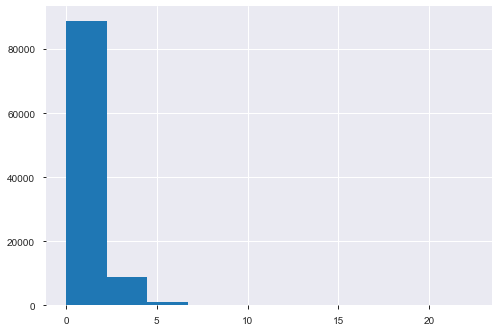

In [259]:
data_to_model.distance_km_ord.hist()

In [271]:
data_to_model[data_to_model.distance_km_ord<=0].distance_km_ord.count()

247

In [272]:
data_to_model[data_to_model.distance_km_ord>=6].distance_km_ord.count()

120

In [273]:
#зачистим выбросы по дистанциям от водителя к заказчику
data_to_model.distance_km.count()

98677

In [274]:
data_to_model = data_to_model[data_to_model.distance_km_ord>0]
data_to_model = data_to_model[data_to_model.distance_km_ord<6]

In [275]:
data_to_model.distance_km.count()

98310

In [278]:
print((98310/100000-1)*100)

-1.6900000000000026


In [279]:
#потеряли менее 2% данных

In [280]:
data_to_model = data_to_model[['weekday_key', 'hour_key','distance_km','distance_km_ord','class','type','driver_response']]

In [281]:
data_to_model.head()

,weekday_key,hour_key,distance_km,distance_km_ord,class,type,driver_response
0,5,20,-1.000,1.367355,1,1,0
1,5,14,18.802,3.423260,2,1,1
2,6,14,6.747,0.411356,1,1,0
3,2,6,-1.000,0.649440,1,1,1
4,4,16,12.383,1.064116,1,1,1


In [282]:
#вот наши данные для модели.
#Дальше посмотрим корреляции и подумаю что делать дальше.
#пошел спать =)

In [307]:
report = pp.ProfileReport(data_to_model)
report.to_file('profile_report_1.html')

In [310]:
corr = data_to_model.corr()
corr = corr.round(2)
corr.style.background_gradient()

,weekday_key,hour_key,distance_km,distance_km_ord,class,type,driver_response
weekday_key,1,0.05,-0.07,0.04,0.01,0.02,0.04
hour_key,0.05,1,-0.05,-0.06,0.02,0.01,0.02
distance_km,-0.07,-0.05,1,-0.1,-0.1,-0.28,-0.31
distance_km_ord,0.04,-0.06,-0.1,1,0.09,0.02,0.08
class,0.01,0.02,-0.1,0.09,1,0.17,0.13
type,0.02,0.01,-0.28,0.02,0.17,1,0.06
driver_response,0.04,0.02,-0.31,0.08,0.13,0.06,1


In [311]:
#Мне нравится. Можно конечно убрать hour_key, так как корреляция самая маленькаяс целевой функцией но я оставлю.

#7. Разделите выборку на обучаемую и тестовую.

In [ ]:
#Буду использовать рендом форест

In [312]:
#сначала сделаем нормализацию даных

In [313]:
headers = list(data_to_model.columns.values)

In [314]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

np_scaled = min_max_scaler.fit_transform(data_to_model)
data_to_model_norm = pd.DataFrame(np_scaled)
data_to_model_norm.columns = headers
data_to_model_norm.head()

,weekday_key,hour_key,distance_km,distance_km_ord,class,type,driver_response
0,0.666667,0.739130,-1.000000,-0.543619,-1.0,-1.0,-1.0
1,0.666667,0.217391,-0.511050,0.142610,0.0,-1.0,1.0
2,1.000000,0.217391,-0.808711,-0.862717,-1.0,-1.0,-1.0
3,-0.333333,-0.478261,-1.000000,-0.783248,-1.0,-1.0,1.0
4,0.333333,0.391304,-0.669547,-0.644836,-1.0,-1.0,1.0


In [316]:
corr = data_to_model_norm.corr()
corr = corr.round(2)
corr.style.background_gradient()

,weekday_key,hour_key,distance_km,distance_km_ord,class,type,driver_response
weekday_key,1,0.05,-0.07,0.04,0.01,0.02,0.04
hour_key,0.05,1,-0.05,-0.06,0.02,0.01,0.02
distance_km,-0.07,-0.05,1,-0.1,-0.1,-0.28,-0.31
distance_km_ord,0.04,-0.06,-0.1,1,0.09,0.02,0.08
class,0.01,0.02,-0.1,0.09,1,0.17,0.13
type,0.02,0.01,-0.28,0.02,0.17,1,0.06
driver_response,0.04,0.02,-0.31,0.08,0.13,0.06,1


In [317]:
#строим деревья

In [318]:
data_to_model_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98310 entries, 0 to 98309
Data columns (total 7 columns):
weekday_key        98310 non-null float64
hour_key           98310 non-null float64
distance_km        98310 non-null float64
distance_km_ord    98310 non-null float64
class              98310 non-null float64
type               98310 non-null float64
driver_response    98310 non-null float64
dtypes: float64(7)
memory usage: 5.3 MB


In [319]:
Y = data_to_model_norm.driver_response
X = data_to_model_norm[['weekday_key', 'hour_key','distance_km','distance_km_ord','class','type']]

In [320]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [321]:
#8. Обучите модель. Напишите в markdown свои наблюдения по полученным результатам.

No handles with labels found to put in legend.


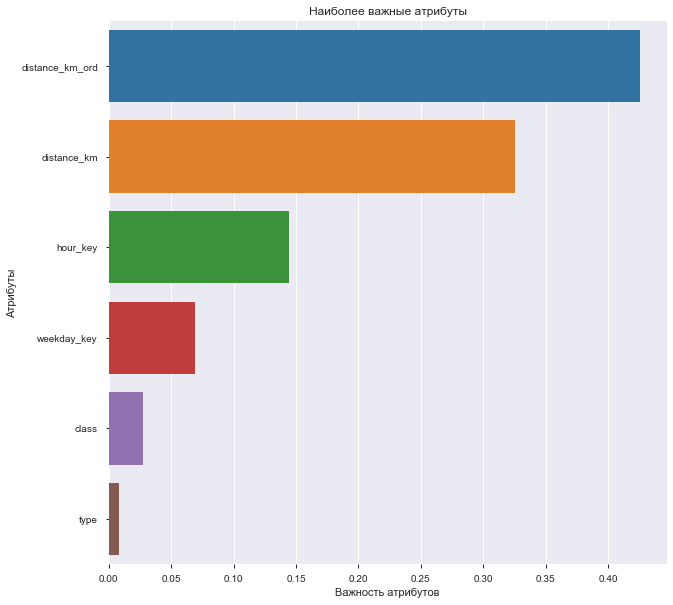

In [322]:
from sklearn.ensemble import RandomForestClassifier

# создаем модель деревья решений
# выбираем 100 деревьев в качестве параметра
model=RandomForestClassifier(n_estimators=100)

# обучаем модель
model.fit(X_train,Y_train)

headers = list(X_train.columns.values)

feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)#влияние на модель

f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.legend()
plt.show()

In [324]:
from sklearn.metrics import classification_report
model_pred = model.predict(X_test)

print(classification_report(Y_test, model_pred))

model.score(X_test, Y_test)

              precision    recall  f1-score   support

        -1.0       0.71      0.69      0.70     14897
         1.0       0.69      0.71      0.70     14596

    accuracy                           0.70     29493
   macro avg       0.70      0.70      0.70     29493
weighted avg       0.70      0.70      0.70     29493



0.6989455124944902

#точность предсказания 70%. Очень хорошая точность по мне.
#Из самого прикольного - что растояние от водителя до заказа это первый элемент по важности при принятии решения. 
#ВТорое место это растояние до места назначения
#Третье время
#По мне достаточно логично. Водитель принимает то что рядом с ним, что бы меньше ехать, и выбираем так же куда ехать - так как от этого определяется цена (гипотеза). Был бы тариф или сколько заплатили было бы понятнее.

#как бы все, НО я хочу проверить что будет если растояние -1 вынести как категорийный признак - free_ride. И дистанцию для таких еще и подменить на среднее значение без учета этих элементов. Будет ли улучшение или нет.


In [326]:
data_to_model_2 = data_to_model.copy()
data_to_model_2.head()

,weekday_key,hour_key,distance_km,distance_km_ord,class,type,driver_response
0,5,20,-1.000,1.367355,1,1,0
1,5,14,18.802,3.423260,2,1,1
2,6,14,6.747,0.411356,1,1,0
3,2,6,-1.000,0.649440,1,1,1
4,4,16,12.383,1.064116,1,1,1


In [335]:
mean_distance_km = data_to_model_2[data_to_model_2.distance_km!=-1].distance_km.mean()
mean_distance_km

23.959056302195652

In [336]:
def free_ride (row):
    if row['distance_km']== -1:
        return 1
    return 0 

In [338]:
data_to_model_2['free_ride'] = data_to_model_2.apply(free_ride, axis=1)

In [339]:
data_to_model_2.head()

,weekday_key,hour_key,distance_km,distance_km_ord,class,type,driver_response,free_ride
0,5,20,-1.000,1.367355,1,1,0,1
1,5,14,18.802,3.423260,2,1,1,0
2,6,14,6.747,0.411356,1,1,0,0
3,2,6,-1.000,0.649440,1,1,1,1
4,4,16,12.383,1.064116,1,1,1,0


In [340]:
def distan_km_maen (row):
    if row['distance_km']== -1:
        return mean_distance_km
    return row['distance_km']

In [341]:
data_to_model_2['distance_km_2'] = data_to_model_2.apply(distan_km_maen, axis=1)

In [342]:
data_to_model_2.head()

,weekday_key,hour_key,distance_km,distance_km_ord,class,type,driver_response,free_ride,distance_km_2
0,5,20,-1.000,1.367355,1,1,0,1,23.959056
1,5,14,18.802,3.423260,2,1,1,0,18.802000
2,6,14,6.747,0.411356,1,1,0,0,6.747000
3,2,6,-1.000,0.649440,1,1,1,1,23.959056
4,4,16,12.383,1.064116,1,1,1,0,12.383000


In [343]:
data_to_model_2 = data_to_model_2[['weekday_key', 'hour_key','distance_km_2','free_ride','distance_km_ord','class','type','driver_response']]
data_to_model_2.head()

,weekday_key,hour_key,distance_km_2,free_ride,distance_km_ord,class,type,driver_response
0,5,20,23.959056,1,1.367355,1,1,0
1,5,14,18.802000,0,3.423260,2,1,1
2,6,14,6.747000,0,0.411356,1,1,0
3,2,6,23.959056,1,0.649440,1,1,1
4,4,16,12.383000,0,1.064116,1,1,1


In [344]:
headers = list(data_to_model_2.columns.values)

In [345]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

np_scaled = min_max_scaler.fit_transform(data_to_model_2)
data_to_model_norm_2 = pd.DataFrame(np_scaled)
data_to_model_norm_2.columns = headers
data_to_model_norm_2.head()

,weekday_key,hour_key,distance_km_2,free_ride,distance_km_ord,class,type,driver_response
0,0.666667,0.739130,-0.418761,1.0,-0.543619,-1.0,-1.0,-1.0
1,0.666667,0.217391,-0.549325,-1.0,0.142610,0.0,-1.0,1.0
2,1.000000,0.217391,-0.854526,-1.0,-0.862717,-1.0,-1.0,-1.0
3,-0.333333,-0.478261,-0.418761,1.0,-0.783248,-1.0,-1.0,1.0
4,0.333333,0.391304,-0.711837,-1.0,-0.644836,-1.0,-1.0,1.0


In [346]:
corr = data_to_model_norm_2.corr()
corr = corr.round(2)
corr.style.background_gradient()

,weekday_key,hour_key,distance_km_2,free_ride,distance_km_ord,class,type,driver_response
weekday_key,1,0.05,-0.07,0.01,0.04,0.01,0.02,0.04
hour_key,0.05,1,-0.05,0.01,-0.06,0.02,0.01,0.02
distance_km_2,-0.07,-0.05,1,0,-0.12,0.02,-0,-0.33
free_ride,0.01,0.01,0,1,0,0.21,0.5,0.07
distance_km_ord,0.04,-0.06,-0.12,0,1,0.09,0.02,0.08
class,0.01,0.02,0.02,0.21,0.09,1,0.17,0.13
type,0.02,0.01,-0,0.5,0.02,0.17,1,0.06
driver_response,0.04,0.02,-0.33,0.07,0.08,0.13,0.06,1


In [ ]:
#интересная штука - тип имеет хорошую корреляцию в фри райдом - где нет дистанции

In [317]:
#строим деревья

In [347]:
data_to_model_norm_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98310 entries, 0 to 98309
Data columns (total 8 columns):
weekday_key        98310 non-null float64
hour_key           98310 non-null float64
distance_km_2      98310 non-null float64
free_ride          98310 non-null float64
distance_km_ord    98310 non-null float64
class              98310 non-null float64
type               98310 non-null float64
driver_response    98310 non-null float64
dtypes: float64(8)
memory usage: 6.0 MB


In [348]:
Y = data_to_model_norm_2.driver_response
X = data_to_model_norm_2[['weekday_key', 'hour_key','distance_km_2','distance_km_ord','class','type','free_ride']]

In [349]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

No handles with labels found to put in legend.


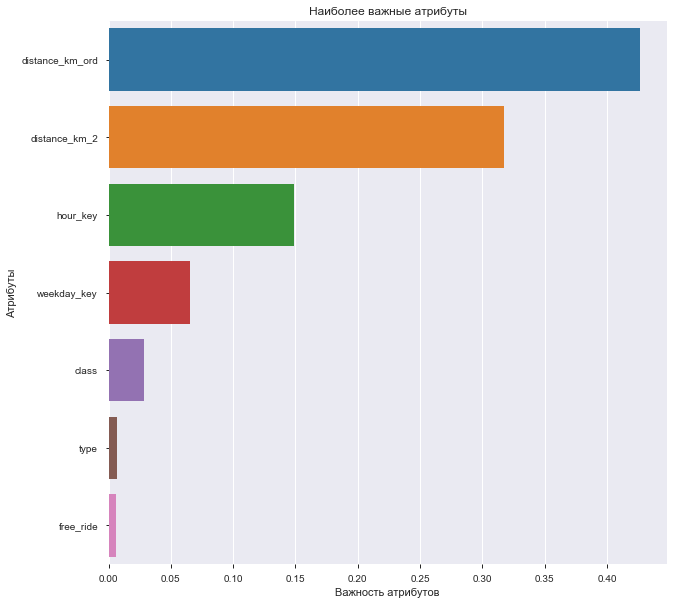

In [350]:
from sklearn.ensemble import RandomForestClassifier

# создаем модель деревья решений
# выбираем 100 деревьев в качестве параметра
model=RandomForestClassifier(n_estimators=100)

# обучаем модель
model.fit(X_train,Y_train)

headers = list(X_train.columns.values)

feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)#влияние на модель

f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.legend()
plt.show()

In [351]:
from sklearn.metrics import classification_report
model_pred = model.predict(X_test)

print(classification_report(Y_test, model_pred))

model.score(X_test, Y_test)

              precision    recall  f1-score   support

        -1.0       0.70      0.70      0.70     14901
         1.0       0.69      0.70      0.70     14592

    accuracy                           0.70     29493
   macro avg       0.70      0.70      0.70     29493
weighted avg       0.70      0.70      0.70     29493



0.6978266029227275

In [352]:
#без изменений

In [355]:
#попробую сделать ван хот ин кодинг на класс. Не уверен что это поможет но хочу посмотреть

In [353]:
dict_class

{'Delivery': 3,
 'Economy': 1,
 'Kids': 3,
 'Premium': 3,
 'Standard': 2,
 'VIP': 3,
 'VIP+': 3,
 'XL': 3}

In [354]:
data_to_model_3 = data_to_model_2

In [356]:
from sklearn import preprocessing

In [359]:
a_class = data_to_model_3['class'].get_values().reshape(-1, 1)

In [360]:
a_class

array([[1],
       [2],
       [1],
       ...,
       [2],
       [1],
       [2]], dtype=int64)

In [361]:
colums_a_class = ['Economy','Standard','Other']

In [362]:
# One-hot encoding
oh_encoder = preprocessing.OneHotEncoder()
oh_encoder.fit(a_class)
oh_result = oh_encoder.transform(a_class).toarray()
oh_result

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [363]:
a_class_df = pd.DataFrame(oh_result, columns=colums_a_class)
a_class_df.index = data_to_model_3.index

In [364]:
data_a_class = pd.concat([data_to_model_3, a_class_df], axis=1)
data_a_class = data_a_class.drop(['class'], axis=1)
data_a_class.head(5)

,weekday_key,hour_key,distance_km_2,free_ride,distance_km_ord,type,driver_response,Economy,Standard,Other
0,5,20,23.959056,1,1.367355,1,0,1.0,0.0,0.0
1,5,14,18.802000,0,3.423260,1,1,0.0,1.0,0.0
2,6,14,6.747000,0,0.411356,1,0,1.0,0.0,0.0
3,2,6,23.959056,1,0.649440,1,1,1.0,0.0,0.0
4,4,16,12.383000,0,1.064116,1,1,1.0,0.0,0.0


In [365]:
headers = list(data_a_class.columns.values)

In [366]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

np_scaled = min_max_scaler.fit_transform(data_a_class)
data_a_class_norm = pd.DataFrame(np_scaled)
data_a_class_norm.columns = headers
data_a_class_norm.head()

,weekday_key,hour_key,distance_km_2,free_ride,distance_km_ord,type,driver_response,Economy,Standard,Other
0,0.666667,0.739130,-0.418761,1.0,-0.543619,-1.0,-1.0,1.0,-1.0,-1.0
1,0.666667,0.217391,-0.549325,-1.0,0.142610,-1.0,1.0,-1.0,1.0,-1.0
2,1.000000,0.217391,-0.854526,-1.0,-0.862717,-1.0,-1.0,1.0,-1.0,-1.0
3,-0.333333,-0.478261,-0.418761,1.0,-0.783248,-1.0,1.0,1.0,-1.0,-1.0
4,0.333333,0.391304,-0.711837,-1.0,-0.644836,-1.0,1.0,1.0,-1.0,-1.0


In [367]:
corr = data_a_class_norm.corr()
corr = corr.round(2)
corr.style.background_gradient()

,weekday_key,hour_key,distance_km_2,free_ride,distance_km_ord,type,driver_response,Economy,Standard,Other
weekday_key,1,0.05,-0.07,0.01,0.04,0.02,0.04,-0,-0,0.02
hour_key,0.05,1,-0.05,0.01,-0.06,0.01,0.02,-0.02,0.01,0.01
distance_km_2,-0.07,-0.05,1,0,-0.12,-0,-0.33,-0.06,0.09,-0.08
free_ride,0.01,0.01,0,1,0,0.5,0.07,-0.24,0.23,0.02
distance_km_ord,0.04,-0.06,-0.12,0,1,0.02,0.08,-0.02,-0.05,0.19
type,0.02,0.01,-0,0.5,0.02,1,0.06,-0.19,0.18,0.02
driver_response,0.04,0.02,-0.33,0.07,0.08,0.06,1,-0.1,0.06,0.11
Economy,-0,-0.02,-0.06,-0.24,-0.02,-0.19,-0.1,1,-0.92,-0.2
Standard,-0,0.01,0.09,0.23,-0.05,0.18,0.06,-0.92,1,-0.2
Other,0.02,0.01,-0.08,0.02,0.19,0.02,0.11,-0.2,-0.2,1


In [368]:
#интересные корреляции класса с другими признаками

In [317]:
#строим деревья

In [369]:
data_a_class_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98310 entries, 0 to 98309
Data columns (total 10 columns):
weekday_key        98310 non-null float64
hour_key           98310 non-null float64
distance_km_2      98310 non-null float64
free_ride          98310 non-null float64
distance_km_ord    98310 non-null float64
type               98310 non-null float64
driver_response    98310 non-null float64
Economy            98310 non-null float64
Standard           98310 non-null float64
Other              98310 non-null float64
dtypes: float64(10)
memory usage: 7.5 MB


In [371]:
Y = data_a_class_norm.driver_response
X = data_a_class_norm[['weekday_key', 'hour_key','distance_km_2','distance_km_ord','type','free_ride','Economy','Standard','Other']]

In [372]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

No handles with labels found to put in legend.


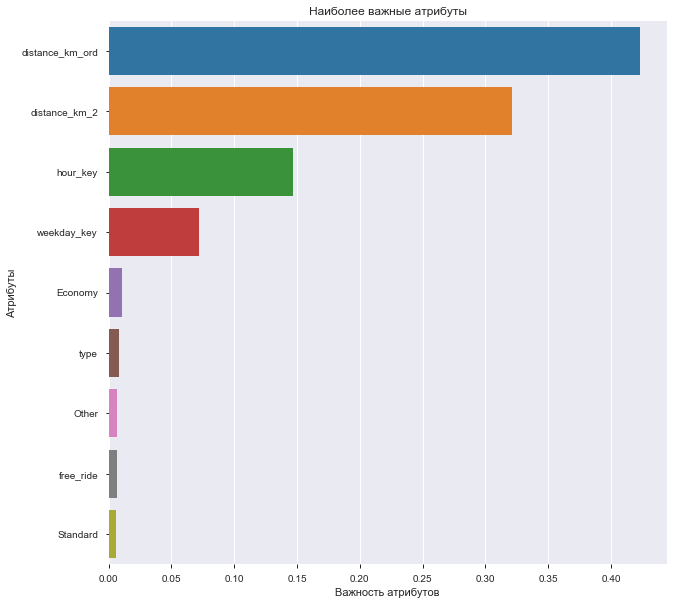

In [373]:
from sklearn.ensemble import RandomForestClassifier

# создаем модель деревья решений
# выбираем 100 деревьев в качестве параметра
model=RandomForestClassifier(n_estimators=100)

# обучаем модель
model.fit(X_train,Y_train)

headers = list(X_train.columns.values)

feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)#влияние на модель

f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.legend()
plt.show()

In [374]:
from sklearn.metrics import classification_report
model_pred = model.predict(X_test)

print(classification_report(Y_test, model_pred))

model.score(X_test, Y_test)

              precision    recall  f1-score   support

        -1.0       0.71      0.69      0.70     14926
         1.0       0.69      0.71      0.70     14567

    accuracy                           0.70     29493
   macro avg       0.70      0.70      0.70     29493
weighted avg       0.70      0.70      0.70     29493



0.696233004441732

In [ ]:
#Итого улучшений нету. Даже идет ухудшение с каждым моим преобразованием
#Оставляем первый вариант. 
#Можно сократить кол-во признаков конечно по РСА, но для меня признаки хорошие и сокращать их не нужно - их по факту не так и много
#МОжно еще подумать по генерацию каких нить доп признаков - к примеру скорость км на время, или попробовать через координаты как то разделить по районам
#Вариаций на самом деле много. Можно бесконечно подбирать вариации
#Но я закончу

In [ ]:
#проверить гипотезу обогащения данных через idшки

In [294]:
list_dist_null = data[data['distance_km']==-1].order_gk.unique()

In [304]:
test = data[data['order_gk'].isin(list_dist_null)]
test.offer_gk.count()

26207

In [306]:
test[test['distance_km']!=-1].count()

offer_gk                  0
weekday_key               0
hour_key                  0
driver_gk                 0
order_gk                  0
driver_latitude           0
driver_longitude          0
origin_order_latitude     0
origin_order_longitude    0
distance_km               0
duration_min              0
offer_class_group         0
ride_type_desc            0
driver_response           0
dtype: int64

In [ ]:
#обогатить данные через связь заказа и предложения не получится...

#Как понимаю это кусок этого датасета https://www.crowdanalytix.com/contests/mckinsey-big-data-hackathon
#После прочтения этого понял что учиться и еще раз учиться =) https://github.com/RutvijBhutaiya/McKinsey-Big-Data-Hackathon
